# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [126]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [133]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [136]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)
print(api_key)

None


In [137]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
bitcoin_headlines



{'status': 'ok',
 'totalResults': 11823,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'https://www.engadget.com/about/editors/richard-lawler',
   'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
   'description': "You can't buy a Tesla with Bitcoin anymore..",
   'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
   'publishedAt': '2021-05-12T22:17:08Z',
   'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'},
  {'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Alex Wilhelm',
   'title': 'What Square’s smashing earnings tell us about consumer bitcoin demand',
   'description': "Today we're talking Square earn

In [24]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 4736,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Manish Singh',
   'title': 'Vitalik Buterin donates $1 billion worth of ‘meme coins’ to India Covid Relief Fund',
   'description': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and “meme coins” worth $1.5 billion in one of the largest-ever individual philanthropy efforts. Buterin transferred 500 ETH and over 50 trillion SHIB (Shiba Inu), a meme coin, worth aroun…',
   'url': 'http://techcrunch.com/2021/05/12/vitalik-buterin-donates-1-billion-worth-of-meme-coins-to-india-covid-relief-fund/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/09/vitalik-buterin-147a2566.jpg?w=600',
   'publishedAt': '2021-05-12T22:46:10Z',
   'content': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 50

In [31]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000
3,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
4,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816


In [32]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
3,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966
4,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917


In [34]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.254695,0.07845,0.025700,0.895950
std,0.384739,0.06993,0.047159,0.080692
min,-0.762700,0.00000,0.000000,0.777000
25%,0.000000,0.00000,0.000000,0.828250
50%,0.300050,0.07100,0.000000,0.892000
75%,0.480025,0.14000,0.052500,0.974500
max,0.845500,0.21700,0.180000,1.000000


In [35]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.118785,0.050100,0.015550,0.93435
std,0.312235,0.058621,0.040203,0.07179
min,-0.401900,0.000000,0.000000,0.77800
25%,0.000000,0.000000,0.000000,0.91500
50%,0.012900,0.042000,0.000000,0.95250
75%,0.254725,0.074500,0.000000,1.00000
max,0.817600,0.210000,0.150000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [57]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [61]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [62]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return token


In [124]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
text = bitcoin_df["text"]

In [125]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
text = ethereum_df["text"]

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [39]:
from collections import Counter
from nltk import ngrams

In [65]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [67]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
corpus = bitcoin_df["text"]
bigram_counter(corpus)

,bigram,count
0,"(elon, musk)",4
1,"(accepting, bitcoin)",3
2,"(char, cryptocurrency)",2
3,"(bitcoin, ethereum)",2
4,"(char, image)",2
5,"(tesla, ha)",2
6,"(ceo, elon)",2
7,"(price, continued)",2
8,"(outage, morning)",2
9,"(week, tesla)",1


In [73]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
corpus = ethereum_df["text"]
bigram_counter(corpus)

,bigram,count
0,"(bitcoin, ethereum)",4
1,"(th, char)",3
2,"(char, reuters)",3
3,"(representation, virtual)",3
4,"(virtual, currency)",3
5,"(currency, ethereum)",3
6,"(ethereum, seen)",3
7,"(seen, front)",3
8,"(front, stock)",3
9,"(stock, graph)",3


In [78]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [108]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
tokens = bitcoin_df["text"]
token_count(tokens, N=10)

[('Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]',
  1),
 ('Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]',
  1),
 ('Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]',
  1),
 ('Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]',
  1),
 ('Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of con

In [106]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
tokens = ethereum_df["text"]
token_count(tokens, N=10)

[('Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]',
  1),
 ('Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]',
  1),
 ('Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]',
  1),
 ('Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]',
  1),
 ('Solana isn’t known yet outside of the crypto community. But insiders think the bl

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

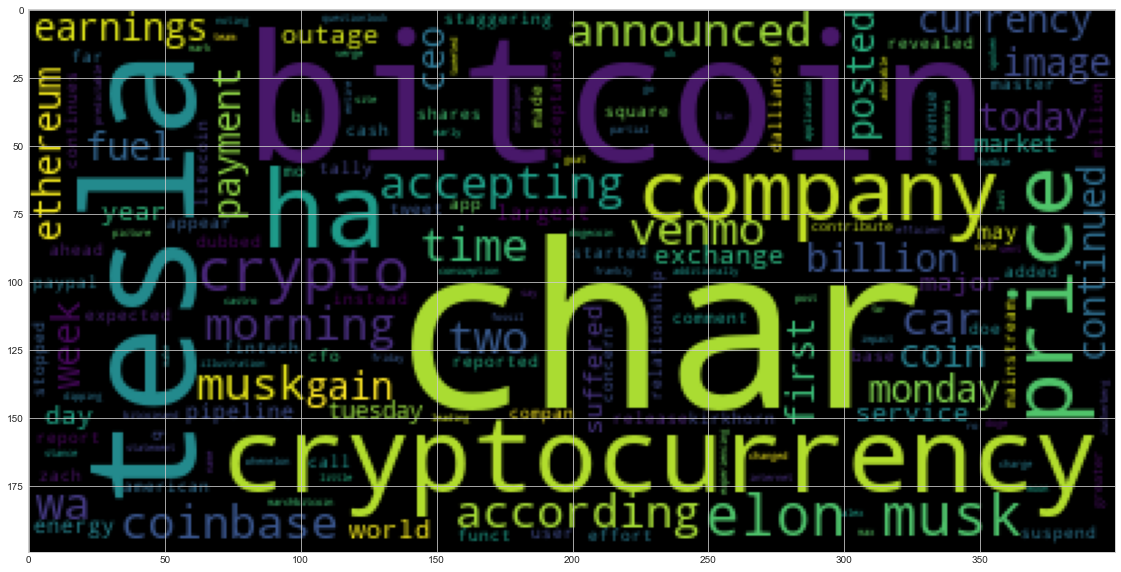

In [81]:
# Generate the Bitcoin word cloud
corpus = bitcoin_df["text"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

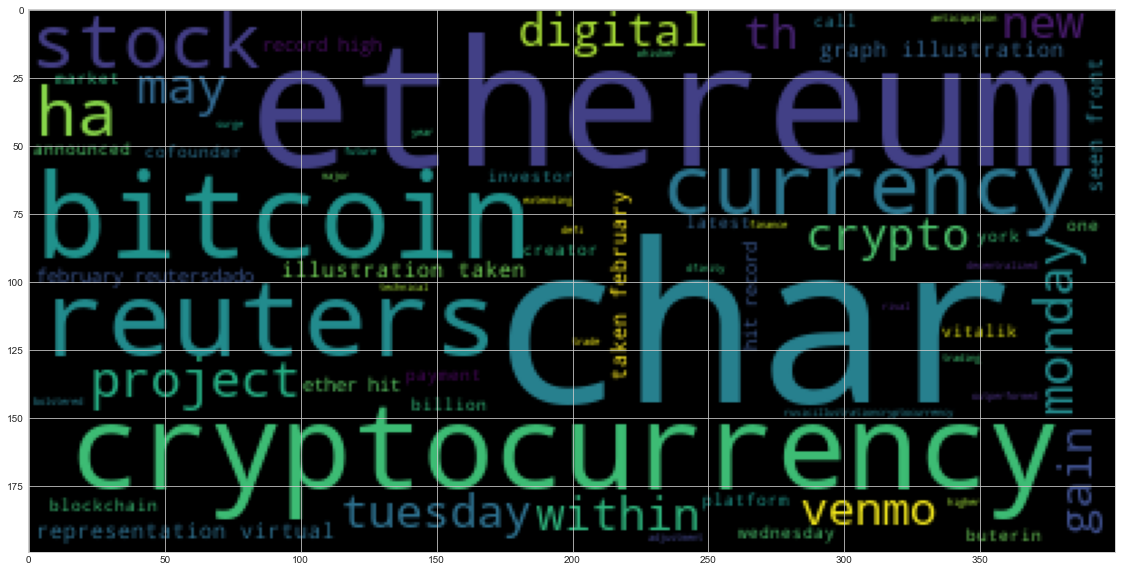

In [82]:
# Generate the Ethereum word cloud
corpus = ethereum_df["text"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [83]:
import spacy
from spacy import displacy

In [85]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [86]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [87]:
# Concatenate all of the Bitcoin text together
article = bitcoin_df["text"].str.cat()

In [109]:
# Run the NER processor on all of the text
doc = nlp(article)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [110]:
# Render the visualization
displacy.render(doc, style='ent')

In [103]:
# List all Entities
print([ent.text for ent in doc.ents])

['Vitalik Buterin', 'Ethereum', 'Wednesday', 'Ethereum', '$1.5 billion', 'Buterin', '500', 'ETH', 'North Carolina', 'Josh Stein', 'Madison Campbell', 'Liesel Vaidya', 'PayPal', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Litecoin', 'Venmo', '70 million', 'Tuesday', 'Venmo', 'Four', 'Anatoly Yakovenko', 'chars]New York', 'CNN', 'Saturday', 'about 6%', 'nearly $58,000', 'CryptoPunks', 'one', 'NFT', 'Meebits', '20,000', '3D', 'Ethereum', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'Reuters', 'February 19, 2021', 'SINGAPORE', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dfinity', 'July 2018', 'Swiss', 'Dominic Williams', 'StockMarketUS Stock Futures Edge Higher', 'Monday', 'U.S.', 'Monday', 'Spanish', 'AI', 'Cryptocurrencies', 'today', 'Vitalik Buterin', '27-year-old', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dow Jones Indices', 'Reuters', 'SINGAPORE', 'May 3', 'Reuters', 'Monday', '3,000', 'last weeks', 'Europe',

---

### Ethereum NER

In [90]:
# Concatenate all of the Ethereum text together
article = ethereum_df["text"].str.cat()

In [111]:
# Run the NER processor on all of the text
doc = nlp(article)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [112]:
# Render the visualization
displacy.render(doc, style='ent')

In [104]:
# List all Entities
print([ent.text for ent in doc.ents])

['Vitalik Buterin', 'Ethereum', 'Wednesday', 'Ethereum', '$1.5 billion', 'Buterin', '500', 'ETH', 'North Carolina', 'Josh Stein', 'Madison Campbell', 'Liesel Vaidya', 'PayPal', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Litecoin', 'Venmo', '70 million', 'Tuesday', 'Venmo', 'Four', 'Anatoly Yakovenko', 'chars]New York', 'CNN', 'Saturday', 'about 6%', 'nearly $58,000', 'CryptoPunks', 'one', 'NFT', 'Meebits', '20,000', '3D', 'Ethereum', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'Reuters', 'February 19, 2021', 'SINGAPORE', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dfinity', 'July 2018', 'Swiss', 'Dominic Williams', 'StockMarketUS Stock Futures Edge Higher', 'Monday', 'U.S.', 'Monday', 'Spanish', 'AI', 'Cryptocurrencies', 'today', 'Vitalik Buterin', '27-year-old', 'February 19, 2021', 'Dado Ruvic/IllustrationCryptocurrency', 'Dow Jones Indices', 'Reuters', 'SINGAPORE', 'May 3', 'Reuters', 'Monday', '3,000', 'last weeks', 'Europe',

---